In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Load & Preprocessing

In [ ]:
import numpy as np

# 경로 지정
# 똑같은 경로에 있는 파일을 여러 번 불러올 때, 반복적으로 사용하면 코드도 지저분하고 나중에 확인하기 힘듭니다!
#그래서, 어차피 경로는 string(문자열)형태로 입력이 되는것이니까, 앞에 공통된 디렉터리는 미리 저장해서 사용하겠다는 의미입니다.
file_path = '/content/drive/MyDrive/kict_dataset/'

# numpy 배열 불러오기
# 우리가 가지고 있는 데이터는, Training 데이터와 Validation데이터를 이미 놔눠줬기 떄문에 이미 있는 파일을 활용 예정!

# np.load(경로!) 괄호 안은, 우리가 pd.read_csv()와 같이 경로를 입력해주면 됩니다.
# 중요한 것은, 우리가 가지고 있는 데이터는, npy 즉, numpy array 형태의 데이터 이기때문에 이런식으로 읽습니다!
# csv 파일이라면, 판다스 패키지를 활용해 pd.read_csv()를 사용합니다~

x_train = np.load(file_path + 'Train/X_train.npy')
y_train = np.load(file_path + 'Train/Y_train.npy')
x_val = np.load(file_path + 'Valid/X_val.npy')
y_val = np.load(file_path + 'Valid/Y_val.npy')

#대회 데이터를 활용했기 떄문에, 여기서는 test데이터는 활용할 수 없음!
#x_test = np.load(file_path + 'Test/X_test.npy')

In [ ]:
# x_train
# type은 데이터의 타입을 보기위한 함수
print(type(x_train))

# shape는 어떤 모양을 가지고 있는지 보는것! 결과를 살펴보면, 3x256x256의 데이터가 1516장 있단느 의미로 해석할 수 있다.
print(x_train.shape)

# numpy의 경우 indexing이 별도의 loc, iloc는 없고(판다스가 제공하는 것) 기본적으로 array[행,열] 식으로 확인 가능!
# 결국 여기서는, 5번째 행까지만 데이터를 보겠다는 의미.
# * 기본적으로 행만 보여주고, 열을 보려면 꼭 array[:,열] 이런식으로 행을 먼저 알려줘야한다!
# ** : 는 전체를 의미. : 앞뒤에 숫자는 ~부터 ~까지를 의미! 
# 예시) array[5:10] 5번째부터 10번째까지
# 예시2) array[:,5:10] 전체 행에 대해서 5~10번째 열에 해당하는 값을 불러오자

print(x_train[:5])

<class 'numpy.ndarray'>
(1516, 3, 256, 256)
[[[[ 0.827451    0.827451    0.827451   ... -0.00392157 -0.46666664
    -0.4823529 ]
   [ 0.827451    0.827451    0.827451   ...  0.35686278 -0.21568626
    -0.49019605]
   [ 0.8352941   0.8352941   0.8352941  ...  0.56078434  0.26274514
    -0.34117645]
   ...
   [ 0.75686276  0.75686276  0.75686276 ...  0.48235297  0.4666667
     0.45882356]
   [ 0.75686276  0.75686276  0.75686276 ...  0.48235297  0.47450984
     0.4666667 ]
   [ 0.75686276  0.75686276  0.75686276 ...  0.47450984  0.47450984
     0.4666667 ]]

  [[ 0.62352943  0.62352943  0.62352943 ... -0.14509803 -0.60784316
    -0.62352943]
   [ 0.62352943  0.62352943  0.62352943 ...  0.21568632 -0.35686272
    -0.6313726 ]
   [ 0.6313726   0.6313726   0.6313726  ...  0.41960788  0.12156868
    -0.4823529 ]
   ...
   [ 0.54509807  0.54509807  0.54509807 ...  0.3411765   0.33333337
     0.32549024]
   [ 0.54509807  0.54509807  0.54509807 ...  0.3411765   0.33333337
     0.33333337]
   [ 0

In [ ]:
# x_train 데이터 범위 확인
# np.max(): 괄호 안의 데이터에서 최댓값을 불러온다!
# np.min(): 괄호 안의 데이터에서 최솟값을 불러온다!
print('최댓값: ', np.max(x_train))
print('최솟값: ', np.min(x_train))


# 여기서 중요한 것은, 결과를 낸 것이 아니라
# 이미지는 원래 하나의 점당 0~255 까지의 값을 가지는데 
# 아래의 최대 최솟값에 따라 -1~+1 사이의 값을 가지기 때문에
# 정규화가 이미 되어있다는 의미! - 정규화가 필요하지 않다!

#** 참고로 이미지에서는 0~255로 표현된 데이터를 사용하면 
# 컴퓨터의 연산 능력도 많이들고 성능도 떨어져 일반적으로 scaling을 해서 사용!

최댓값:  1.0
최솟값:  -1.0


In [ ]:
# y_train
print(type(y_train))
print(y_train.shape)
print(y_train[:5])

<class 'numpy.ndarray'>
(1516,)
[5 0 1 0 5]


In [ ]:
# y_train 데이터 범위 확인
# np.unique()는 괄호 안에 있는 어레이 데이터에서 고유한 값(여기서는 카테고리!)을 찾아내 주는 것을 의미한다.
np.unique(y_train)

array([0, 1, 2, 3, 4, 5], dtype=int32)

## GrayScale 변환

In [ ]:
# 256 x 256 크기의 RGB 이미지 데이터
x_train.shape

(1516, 3, 256, 256)

In [ ]:
def get_gray(data):
    # 데이터를 저장할 리스트를 만든다
    gray_list = []

    # 우리가 받아오는 데이터에서 처음부터 끝까지 하나씩 뽑아서 수행 할 것인데,
    # data에 있는 하나의 데이터를 우리는 img라고 부를것이다.
    # array데이터이기 때문에
    # np.sum()을 수행할 수 있고, 여기서는 img.sum()으로 수행!
    # axis 는 축을 의미 하며 0은 행, 1은 열을 의미!
    for img in data:
        gray = img.sum(axis=0)/3

        # list.append() list에 괄호 안의 값을 추가하겠다는 의미.
        gray_list.append(gray)
    
    # np.stack --> 그레이 스킬로 변환한 array들을 합치느라 씀!
    return np.stack(gray_list, axis=0)

In [ ]:
x_train = get_gray(x_train)
x_val = get_gray(x_val)
#x_test = get_gray(x_test)

In [ ]:
print(x_train.shape)
print(x_val.shape)
#print(x_test.shape)

(1516, 256, 256)
(506, 256, 256)
(505, 256, 256)


# Classification Models

## 1. Logistic Classification

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# LogisticRegression 모델 정의
lr = LogisticRegression(random_state=1)

#### Parameters

- `penalty`: 규제에 사용된 기준을 지정 (`l1`, `l2`, `elasticnet`, `none`)

- `C`: 허용 가능한 오차 범위 정의

- `random_state`: 난수 seed 설정

- `solver`: 최적화 문제에 사용하는 알고리즘

- `max_iter`: 계산에 사용할 작업 수

- `multi_class`: 다중 분류 시에 `ovr, multinomial, auto`로 설정

- `verbose`: 동작 과정에 대한 출력 메시지

- `warm_start`: 이전 모델을 초기화로 적합하게 사용할 것인지 여부

In [ ]:
# Error 발생 !
# -> Logistic Regression을 활용하기 위해서는 3차원을 1차원으로 flatten 시켜줘야함
lr.fit(x_train, y_train)

ValueError: ignored

In [ ]:
# 기존의 x_train의 shape 확인
x_train.shape

(1516, 256, 256)

In [ ]:
# 256 * 256 = 65536
x_train = x_train.reshape(x_train.shape[0], 65536)
x_val = x_val.reshape(x_val.shape[0], 65536)
x_test = x_test.reshape(x_test.shape[0], 65536)

In [ ]:
# 바뀐 x_train의 shape 확인
x_train.shape

(1516, 65536)

In [ ]:
# Logistic Regression 학습
lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [ ]:
# 예측 수행
y_pred = lr.predict(x_val)

In [ ]:
# Logistic Regression 모델 평가
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[16 17  6 25 11  8]
 [ 7 16 19 13 27  6]
 [ 7 15 16 13 24  9]
 [14 18 12 34 29  6]
 [ 4 23 14 14 43  7]
 [ 2 11  5  2  7  6]]
              precision    recall  f1-score   support

           0       0.32      0.19      0.24        83
           1       0.16      0.18      0.17        88
           2       0.22      0.19      0.21        84
           3       0.34      0.30      0.32       113
           4       0.30      0.41      0.35       105
           5       0.14      0.18      0.16        33

    accuracy                           0.26       506
   macro avg       0.25      0.24      0.24       506
weighted avg       0.26      0.26      0.26       506



## 2. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# 가우시안 NB 분류기 생성
nb = GaussianNB()

In [ ]:
# 가우시안 NB 분류기 학습
nb.fit(x_train, y_train)

GaussianNB()

In [ ]:
# 결과 예측
y_pred = nb.predict(x_val)

In [ ]:
# 가우시안 NB 분류기 평가
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[56  3  9  2  6  7]
 [11 21 14  1 16 25]
 [12 19 22  3 10 18]
 [15 13 19 20 41  5]
 [20  4  3  4 59 15]
 [ 5  3  2  1  7 15]]
              precision    recall  f1-score   support

           0       0.47      0.67      0.55        83
           1       0.33      0.24      0.28        88
           2       0.32      0.26      0.29        84
           3       0.65      0.18      0.28       113
           4       0.42      0.56      0.48       105
           5       0.18      0.45      0.25        33

    accuracy                           0.38       506
   macro avg       0.39      0.39      0.36       506
weighted avg       0.43      0.38      0.37       506



## 3. K-Nearest Neighbor (K-최근접 이웃, KNN)

- 데이터가 주어지면 그 주변(이웃)의 데이터를 살펴본 뒤 더 많은 데이터가 포함되어 있는 범주로 분류하는 방식

- 새로운 데이터(빨간 점)가 주어졌을 때, 이를 Class A로 분류할지 Class B로 분류할지를 판단하는 문제

    - k=3일 때: 가장 가까운 주변의 3개의 데이터를 본 뒤, 3개의 주변 데이터가 더 많이 포함되어 있는 범주로 분류

    - k=6일 때: 가장 가까운 주변의 3개의 데이터를 본 뒤, 6개의 주변 데이터가 더 많이 포함되어 있는 범주로 분류

- Lazy Model: 훈련이 따로 필요 없으며, real-time 예측이 이루어지기 때문에 속도가 빠름

- 거리 계산: 유클리드 거리, 맨해튼 거리 활용 가능

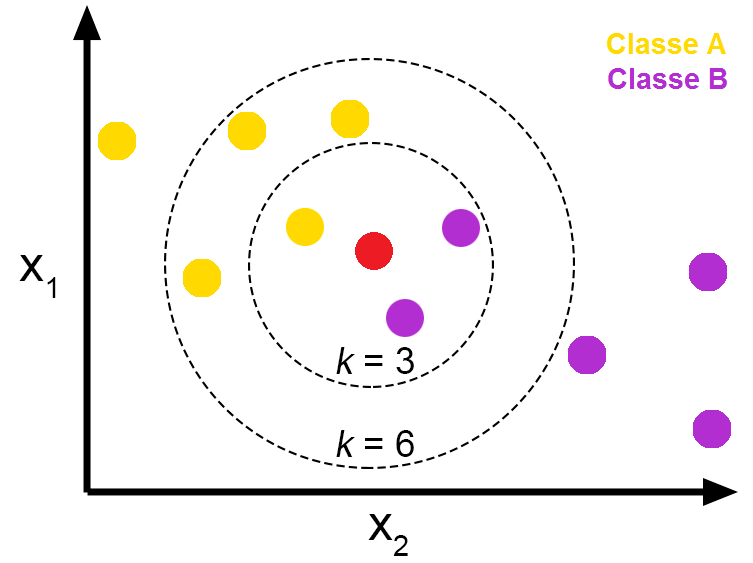

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# 5개의 이웃을 참고하는 KNN 모델 정의
knn = KNeighborsClassifier(n_neighbors=5)

#### Parameters

- `n_neighbors`: 활용할 이웃의 수

- `weights`

    - `uniform`: 모든 포인트의 이웃을 같은 중요도로 계산함

    - `distance`: 포인트와 이웃들의 거리에 따라 가중치를 매겨 계산함 (가까운 이웃일수록 높은 가중치를 부여함)

In [ ]:
# KNN 모델 학습
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
# x_val에 대한 예측 수행
y_pred = knn.predict(x_val)

In [ ]:
# KNN 모델 평가

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[43 20  4  4 12  0]
 [ 4 33  8  9 27  7]
 [21 16 16  2 23  6]
 [20 11  4 39 37  2]
 [12 18  1 12 61  1]
 [ 6  5  4  5  5  8]]
              precision    recall  f1-score   support

           0       0.41      0.52      0.46        83
           1       0.32      0.38      0.35        88
           2       0.43      0.19      0.26        84
           3       0.55      0.35      0.42       113
           4       0.37      0.58      0.45       105
           5       0.33      0.24      0.28        33

    accuracy                           0.40       506
   macro avg       0.40      0.38      0.37       506
weighted avg       0.42      0.40      0.39       506



## 4. SVM (Support Vector Machine)

- 패턴인식, 자료분석을 위한 지도학습 모델 분류와 회귀 분석을 위해 사용

    1. 두 카테고리 중 어느 하나에 속한 데이터 집합이 주어졌을 때
    2. 주어진 데이터 집합을 바탕으로 새로운 데이터가 어느 카테고리에 속하는지 판단하는 비확률적 이진 선형분류모델을 생성함
    3. 만들어진 분류 모델은 데이터가 사상된 공간에서 경계로 표현되는데, SVM은 그 중 가장 큰 폭을 가진 경계를 찾음

- Support Vector

    - 두 가지 카테고리에 해당하는 데이터셋들의 최외각에 있는 샘플들

    - 이러한 최외각의 벡터를 토대로 margin을 구할 수 있음

- Margin: support vector를 통해 구한 두 카테고리 사이의 거리를 m이라 하고, 이를 최대화해야 함

- 결정 경계(Decision Boundary), 즉 분류를 위한 기준선을 정의하는 모델

- 두 부류 사이의 여백이 가장 넓어지면(= margin의 최대화) 가장 잘 분류했다고 할 수 있음

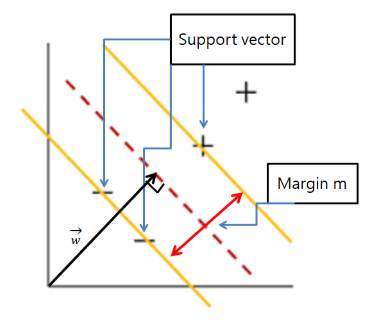

In [ ]:
from sklearn.svm import SVC

In [ ]:
# 선형분리 SVM 모델 정의
svm = SVC(kernel='linear', random_state=1)

#### Parameters

- `C`: 허용 가능한 오차 범위 정의

- `kernel`: 분류에 활용한 커널 타입 정의

    - `linear`: 선형 SVM

    - `poly`: 다항식 커널 함수 사용, 비선형 SVM

    - `rbf`: RBF (Radial Basis Function, 방사 기저 함수) 커널 함수 사용, 비선형 SVM

- `degree`: 다항차수로 분류할 때의 차수 정의 (커널 함수가 `poly`일 때 사용)

- `gamma`: 곡률 경계 (`rbf`, `poly`, `sigmoid` 튜닝)

In [ ]:
# 선형 SVM 모델 학습
svm.fit(x_train, y_train)

SVC(kernel='linear', random_state=1)

In [ ]:
# x_val에 대한 예측 수행
y_pred = svm.predict(x_val)

In [ ]:
# 선형 SVM 모델 평가

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[27 16  8 14 11  7]
 [ 7 27 17 13 20  4]
 [16 18 17 13 10 10]
 [26 16 13 41 14  3]
 [18 19 14 15 37  2]
 [ 3  8  6  4  5  7]]
              precision    recall  f1-score   support

           0       0.28      0.33      0.30        83
           1       0.26      0.31      0.28        88
           2       0.23      0.20      0.21        84
           3       0.41      0.36      0.38       113
           4       0.38      0.35      0.37       105
           5       0.21      0.21      0.21        33

    accuracy                           0.31       506
   macro avg       0.29      0.29      0.29       506
weighted avg       0.31      0.31      0.31       506



## 5. Decision Tree (결정 트리)

- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내어 트리 기반의 분류 규칙을 만드는 알고리즘

- Decision Tree의 구조

    - Root Node (루트 노드): 시작점

    - Leaf Node (리프 노드): 결정된 클래스 값

    - Decision Node / Internal Node (규칙 노드 / 내부 노드): 데이터셋의 특성이 결합하여 만들어진 분류를 위한 규칙 조건

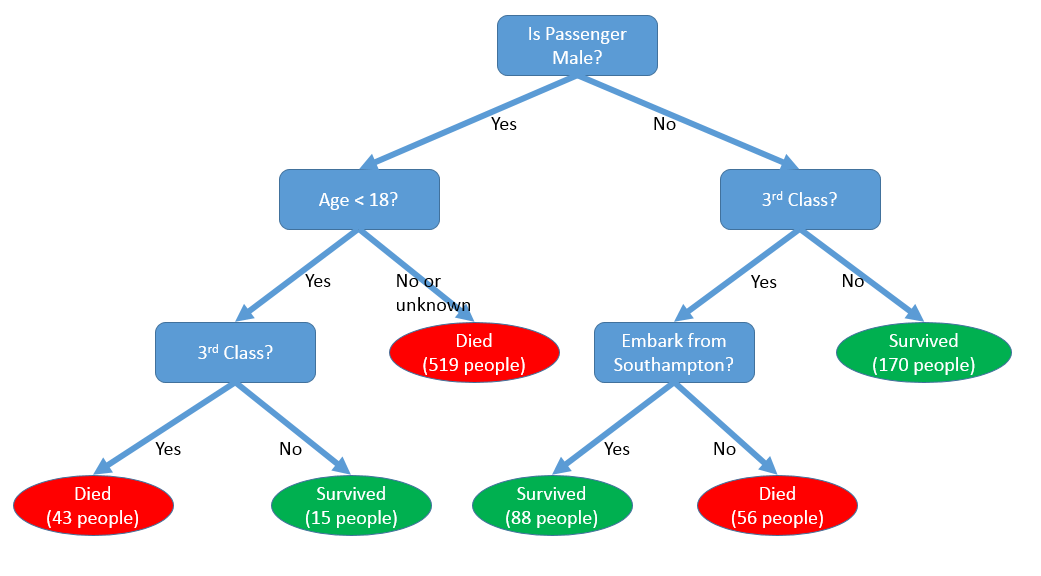

#### Parameters

- `min_samples_split`

    - 노드를 분할하기 위한 최소한의 샘플 데이터 수

    - 과적합을 제어하는 데 사용하며, 작게 설정할수록 분할 노드가 많아져 과적합 가능성 증가

- `min_samples_leaf`

    - Leaf Node가 되기 위해 필ㅇ료한 최소한의 샘플 데이터 수
    
    - `min_samples_split`과 함께 과적합 제어 용도

    - 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정해야 함

- `max_features`: 최적의 분할을 위해 고려할 최대 feature 개수

- `max_depth`

    - 트리의 최대 깊이

    - 깊이가 깊어지면 과적합의 위험성

- `max_leaf_nodes`: Leaf Node의 최대 개수

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree 생성
dt = DecisionTreeClassifier(max_depth=3, random_state=1)

In [ ]:
# Decision Tree 학습
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [ ]:
# x_val에 대한 예측 수행
y_pred = dt.predict(x_val)

In [ ]:
# Decision Tree 평가

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[29  0  7 11 36  0]
 [ 8  0  2 16 62  0]
 [ 8  0  4  8 64  0]
 [ 5  0  2 65 41  0]
 [17  0  1 16 71  0]
 [ 1  0  0  6 26  0]]
              precision    recall  f1-score   support

           0       0.43      0.35      0.38        83
           1       0.00      0.00      0.00        88
           2       0.25      0.05      0.08        84
           3       0.53      0.58      0.55       113
           4       0.24      0.68      0.35       105
           5       0.00      0.00      0.00        33

    accuracy                           0.33       506
   macro avg       0.24      0.27      0.23       506
weighted avg       0.28      0.33      0.27       506



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Ensemble Learning (앙상블 학습)

- 여러 개별 모델을 조합하여 최적의 모델로 일반화하는 방법

- 강력한 하나의 모델을 사용하는대신, 보다 약한 모델 여러 개를 조합하여 더 정확한 예측에 도움을 줌

- ex) bagging, boosting, stacking, voting

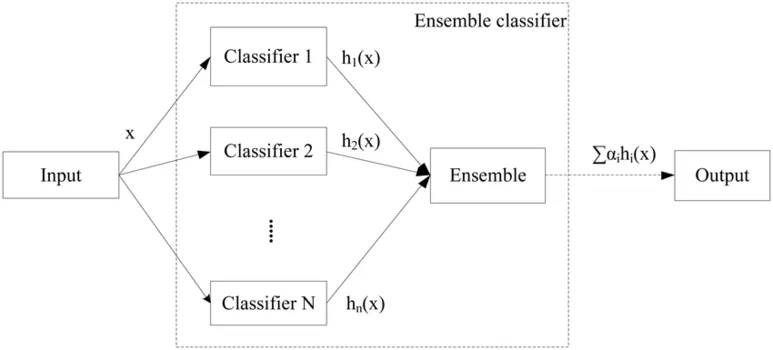

## 1. Bagging

- Bootstrap Aggregation: 샘플을 여러 번 뽑아서(bootstrap) 각 모델을 학습시킨 다음 결과물을 집계(aggregation)

- 복원 랜덤 추출한 데이터들로 모델 학습

    - 범주형 데이터: 투표 방식(voting)으로 집계

    - 연속형 데이터: 평균으로 집계

- ex) Random Forest

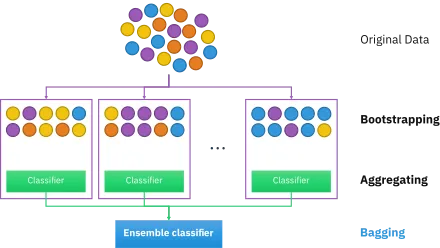

### Random Forest

- Decision Tree가 모여 Random Forest를 구성

- Tree를 만들 때 사용될 특성들을 제한함으로써 각 Tree에 다양성을 주어, 각 분할에서 전체 속성들 중 일부만 고려하여 Tree를 작성

- 각각의 Tree를 만드는 데 있어 쓰이는 특징들을 모작위로 선정함

- 이렇게 여러 Decision Tree들이 내린 예측 값들 중, 가장 많이 나온 값을 최종 예측값으로 정함

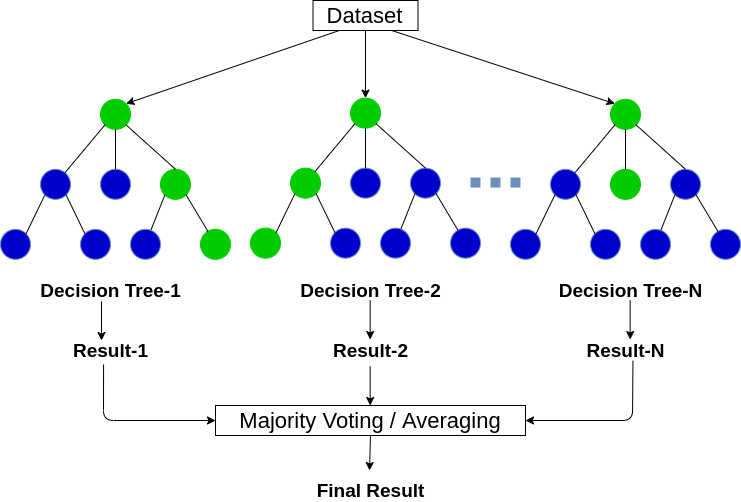

#### Parameters

- `n_estimators`
    
    - Random Forest 안의 Decision Tree의 개수

    - Decision Tree가 많을수록 더 깔끔한 결정 경계를 얻을 수 있으나, 그만큼 메모리와 훈련 시간이 증가함

- `max_features`

    - 무작위로 선택할 특성의 개수

    - 값이 클수록 Random Forest의 Tree들이 매우 비슷해지고, 가장 두드러진 특성에 맞게 예측 진행

    - 값이 작을수록 Random Forest의 Tree들이 서로 달라지며 과대적합이 줄어듦

- `max_depth`: Tree의 깊이

- `min_samples_leaf`: Leaf Node가 되기 위한 최소한의 샘플 데이터 수

- `min_samples_split`: 노드를 분할하기 위한 최소한의 데이터 수

- `max_leaf_nodes`: Leaf Node의 최대 개수

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest 분류기 정의
rf = RandomForestClassifier(n_estimators=100)

In [ ]:
# Random Forest 분류기 학습
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
# x_val에 대한 예측 수행
y_pred = rf.predict(x_val)

In [ ]:
# Random Forest 분류기 평가

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[56  3  9 12  3  0]
 [ 7 59  7  3 12  0]
 [ 7 32 35  0 10  0]
 [13 11  5 79  5  0]
 [17 16  4  9 59  0]
 [ 6  7  7  2  3  8]]
              precision    recall  f1-score   support

           0       0.53      0.67      0.59        83
           1       0.46      0.67      0.55        88
           2       0.52      0.42      0.46        84
           3       0.75      0.70      0.72       113
           4       0.64      0.56      0.60       105
           5       1.00      0.24      0.39        33

    accuracy                           0.58       506
   macro avg       0.65      0.54      0.55       506
weighted avg       0.62      0.58      0.58       506



## 2. Boosting

- Bagging은 각각의 모델이 독립적으로 학습하는 반면, Boosting은 이전 모델의 학습이 다음 모델의 학습에 영향을 미침

    - 이전 모델의 학습 결과에 따라 오답에 대해서는 높은 가중치를 부여하고, 정답에 대해서는 낮은 가중치를 부여하여 가중치가 다음 모델에 영향을 미침

- 잘못 분류된 데이터에 집중해서 새로운 분류 규칙을 만드는 과정을 반복

- ex) AdaBoost, Gradient Boost, XGBoost, LightGBM, CatBoost, ...

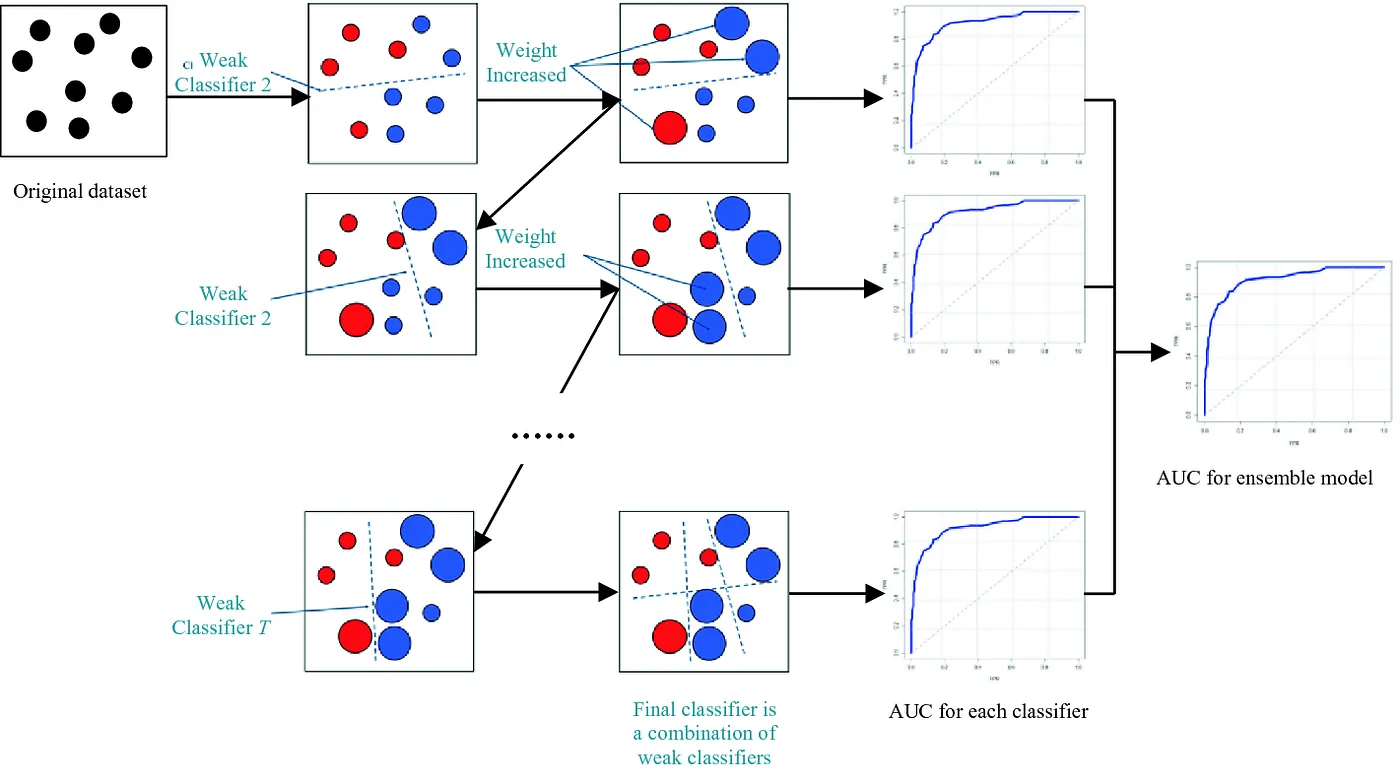

> #### Bagging vs. Boosting
- 공통점: 전체 데이터 집합으로부터 복원 랜덤 샘플링으로 훈련 집합을 생성
- 차이점
    - Bagging은 병렬학습, Boosting은 순차학습
    - Bagging은 균일한 확률분포에 의해 훈련 집합을 생성하고, Boosting은 분류하기 어려운 훈련 집합을 생성함
    - Bagging은 과대적합에 강하고, Boosting은 오답에 더 집중할 수 있기 때문에 높은 정확도를 보이지만 과대적합의 가능성이 있음
    - Boosting이 Bagging보다 일반적으로 더 시간이 오래 걸림

### AdaBoost

- Adaptive Boosting

- 초기 모델을 아주 약한 모델(Weak Learner)로 설정한 뒤, 매 스텝마다 가중치를 활용하여 이전 모델의 약점을 보완하는 새로운 모델을 순차적으로 적합시킴

#### Parameters

- `base_estimators`: 학습에 사용하는 알고리즘

- `n_estimators`: 생성할 약한 학습기의 개수 지정

- `learning_rate`: 학습을 진행할 때마다 적용하는 학습률

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost 분류기 정의
ab = AdaBoostClassifier(n_estimators=100,
                        learning_rate=0.1)

In [ ]:
# AdaBoost 분류기 학습 (오래 걸림)
ab.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

In [ ]:
# x_val에 대한 예측 수행
y_pred = ab.predict(x_val)

In [ ]:
# AdaBoost 분류기 평가

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[35 17  8 13 10  0]
 [ 6 61  5  4 12  0]
 [ 5 44 19  7  9  0]
 [ 4 23 10 56 20  0]
 [14 32  2  5 52  0]
 [ 5 14  1  1  7  5]]
              precision    recall  f1-score   support

           0       0.51      0.42      0.46        83
           1       0.32      0.69      0.44        88
           2       0.42      0.23      0.29        84
           3       0.65      0.50      0.56       113
           4       0.47      0.50      0.48       105
           5       1.00      0.15      0.26        33

    accuracy                           0.45       506
   macro avg       0.56      0.41      0.42       506
weighted avg       0.52      0.45      0.44       506



### Gradient Boosting (GBM)

- 경사하강법(Gradient Descent)을 이용해 가중치 업데이트를 수행

- Gradient(잔차, residual)를 이용하여 이전 모델의 약점을 보완하는 새로운 모델을 순차적으로 적합한 뒤, 이들을 선형 결합하여 얻어진 모형을 생성하는 지도학습 알고리즘

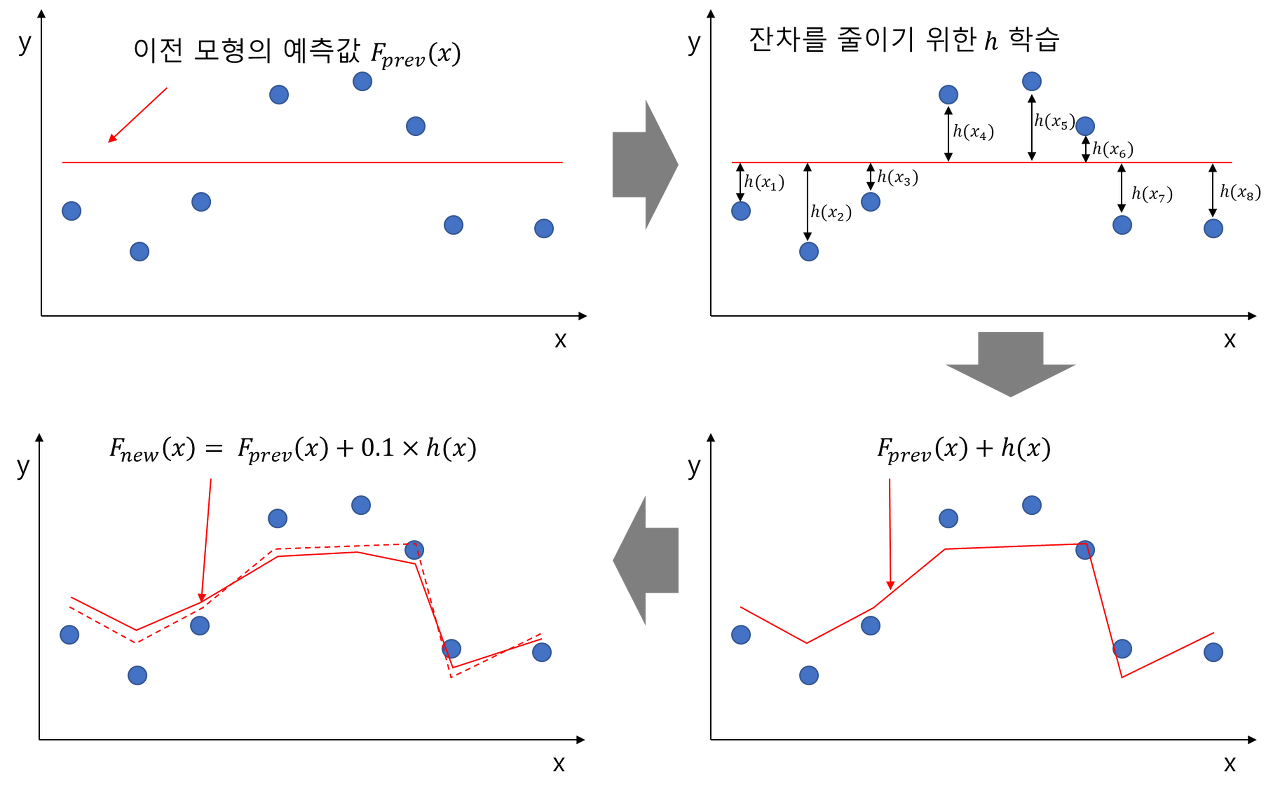

#### Parameters

- `n_estimators`: 생성할 Tree의 개수 지정

- `loss`: 경사하강법에서 사용할 비용함수 지정

- `learning_rate`: 학습을 진행할 때마다 적용하는 학습률

- `subsample`

    - 개별 Tree가 학습에 사용하는 데이터 새플링 비율 (0~1 사이의 값)

    - 이 값을 조절하여 Tree 간의 상관도를 줄일 수 있음

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting 분류기 정의
gbc = GradientBoostingClassifier(n_estimators=3,
                                 loss='deviance',
                                 min_samples_leaf=5,
                                 max_depth=3,
                                 learning_rate=0.1,
                                 random_state=1)

In [ ]:
# GBM 학습
gbc.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


GradientBoostingClassifier(loss='deviance', min_samples_leaf=5, n_estimators=3,
                           random_state=1)

In [ ]:
# x_val에 대한 예측 수행
y_pred = gbc.predict(x_val)

In [ ]:
# GBM 평가

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[34 10  6 27  6  0]
 [ 5 28  1 30 23  1]
 [ 7 29 10 17 21  0]
 [ 4  7  4 86 12  0]
 [12 11  0 24 58  0]
 [ 2  6  2 12  9  2]]
              precision    recall  f1-score   support

           0       0.53      0.41      0.46        83
           1       0.31      0.32      0.31        88
           2       0.43      0.12      0.19        84
           3       0.44      0.76      0.56       113
           4       0.45      0.55      0.50       105
           5       0.67      0.06      0.11        33

    accuracy                           0.43       506
   macro avg       0.47      0.37      0.35       506
weighted avg       0.45      0.43      0.40       506



### XGBoost

- 기존 Gradient Tree Boosting 알고리즘에 과적합 방지를 위한 기법이 추가된 지도학습 알고리즘

In [ ]:
from xgboost import XGBClassifier

# XGBoost 모델 선언
xgb = XGBClassifier(n_estimators=100,
                    learning_rate=0.1,
                    random_state=1)

In [ ]:
# XGBoost 모델 학습
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
# x_val에 대한 예측 수행
y_pred = gbc.predict(x_val)

In [ ]:
# XGBoost 평가

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[34 10  6 27  6  0]
 [ 5 28  1 30 23  1]
 [ 7 29 10 17 21  0]
 [ 4  7  4 86 12  0]
 [12 11  0 24 58  0]
 [ 2  6  2 12  9  2]]
              precision    recall  f1-score   support

           0       0.53      0.41      0.46        83
           1       0.31      0.32      0.31        88
           2       0.43      0.12      0.19        84
           3       0.44      0.76      0.56       113
           4       0.45      0.55      0.50       105
           5       0.67      0.06      0.11        33

    accuracy                           0.43       506
   macro avg       0.47      0.37      0.35       506
weighted avg       0.45      0.43      0.40       506



### LightGBM

- Tree 기준 (level-wise)이 아닌 Leaf 기준 분할 방식 사용 (leaf-wise)

- Tree의 균형을 맞추지 않고 최대 손실 값을 가지는 Leaf Node를 지속적으로 분할하며 깊고 비대칭적인 Tree 생성

- 동일한 leaf를 확장할 때, leaf-wise 알고리즘은 level-wise 알고리즘보다 더 많은 손실을 줄일 수 있음

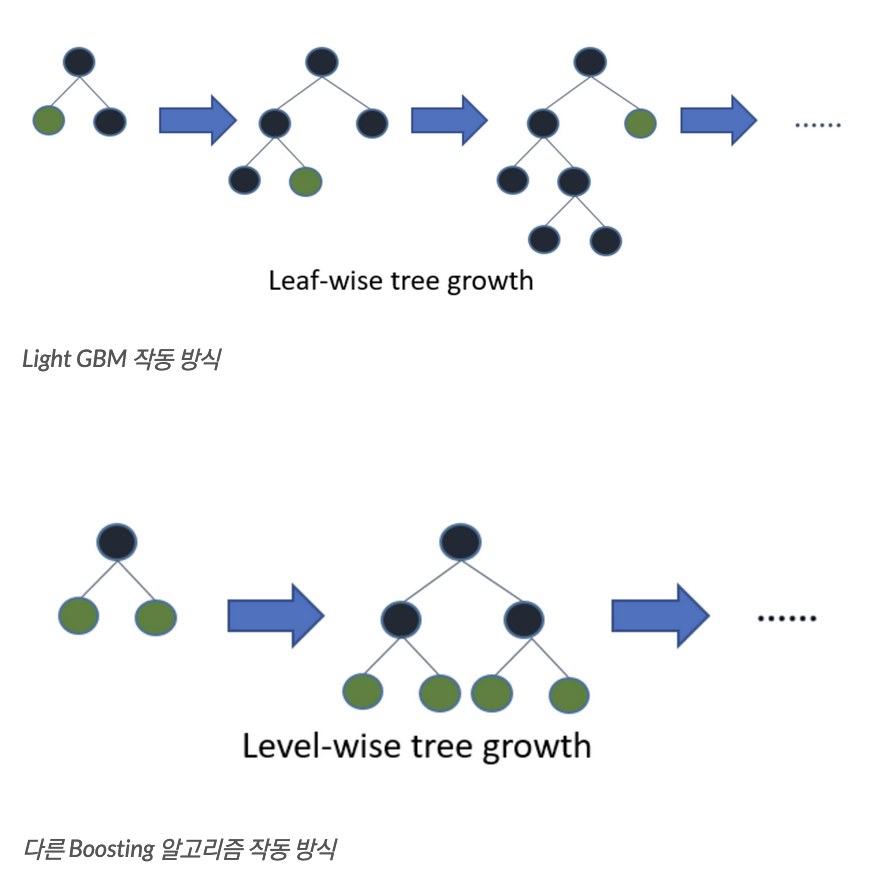

#### Parameters

- `num_iterations`: 반복 수행하려는 Tree의 개수

- `objective`: 수치예측이면 regression, 이진분류면 binary

- `boosting`: 부스팅 방법

    - `gbdt`: Gradient Boosting Decision Tree

    - `rf`: Random Forest

- `bagging_fraction`: 데이터 샘플링 비율로, 과대적합을 제어함

- `feature_fraction`: 개별 Tree 학습 시 무작위로 선택하는 특성의 비율

- `lambda_l1`: L1 regulation 제어

- `lambda_l2`: L2 regulation 제어

In [ ]:
from lightgbm import LGBMClassifier

# LGBM 분류기 정의
lgbm = LGBMClassifier(n_estimators=100)

In [ ]:
# LGBM 분류기 학습
lgbm.fit(x_train, y_train)

LGBMClassifier()

In [ ]:
# x_val에 대한 예측 수행
y_pred = lgbm.predict(x_val)

In [ ]:
# LGBM 평가

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[57  2 13  7  4  0]
 [ 6 53  7  7 14  1]
 [ 8 25 38  4  8  1]
 [ 9 10  7 76 11  0]
 [17 13  9  6 60  0]
 [ 6  9  4  0  6  8]]
              precision    recall  f1-score   support

           0       0.55      0.69      0.61        83
           1       0.47      0.60      0.53        88
           2       0.49      0.45      0.47        84
           3       0.76      0.67      0.71       113
           4       0.58      0.57      0.58       105
           5       0.80      0.24      0.37        33

    accuracy                           0.58       506
   macro avg       0.61      0.54      0.55       506
weighted avg       0.60      0.58      0.57       506



## 3. Stacking

- CV(cross validation) 기반으로 개별 모델이 예측한 데이터를 다시 메타 데이터셋으로 사용하여 최종 모델 Meta Learner에서 학습하는 방식

- Base Learner (model stack)에서 동일한 데이터 원본을 가지고 학습하게 되면 과대적합의 문제가 발생함

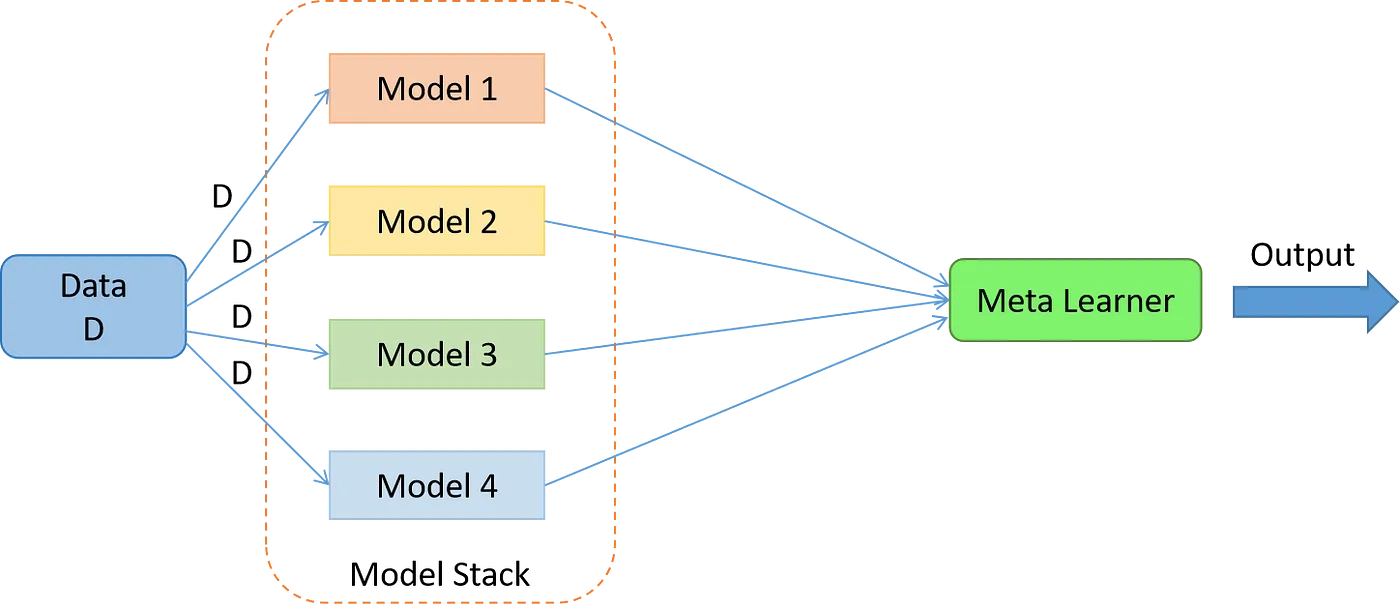

- 따라서 데이터셋을 k번으로 나누어 train set과 test set에 활용함

- training folds와 validation fold로 나누는 과정을 k번 반복함

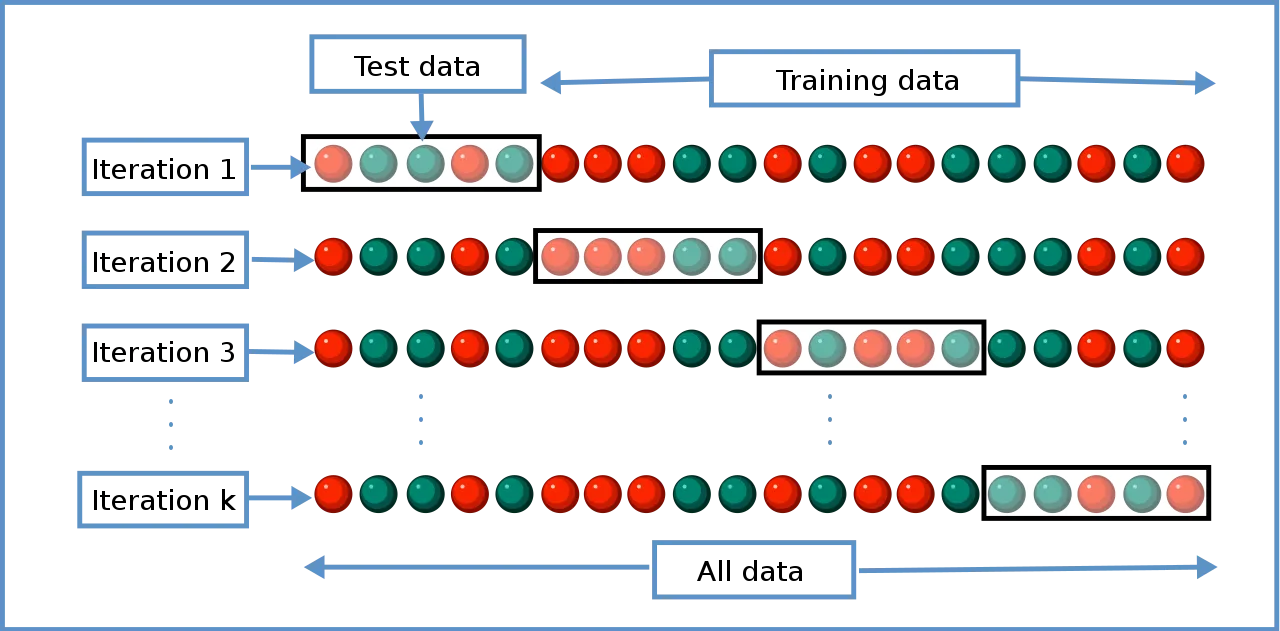

## 4. Voting

- 각각 다른 알고리즘을 이용한 분류기를 결합하는 방식으로 최종 예측값을 투표하는 방식

    - Bagging은 서로 같은 알고리즘을 이용한 분류기가 데이터 샘플링을 각자 다르게 가져면서 학습을 수행하는 방식

- Voting의 유형

    - Hard Voting: 예측한 결과값들 중 다수의 분류기가 결정한 예측 결과값을 최종 Voting 결과값으로 선정

    - Soft Voting: 각 분류기별 레이블 값 결정 확률을 평균 낸 확률이 가장 높은 레이블 값을 최종 Voting 결과값으로 선정

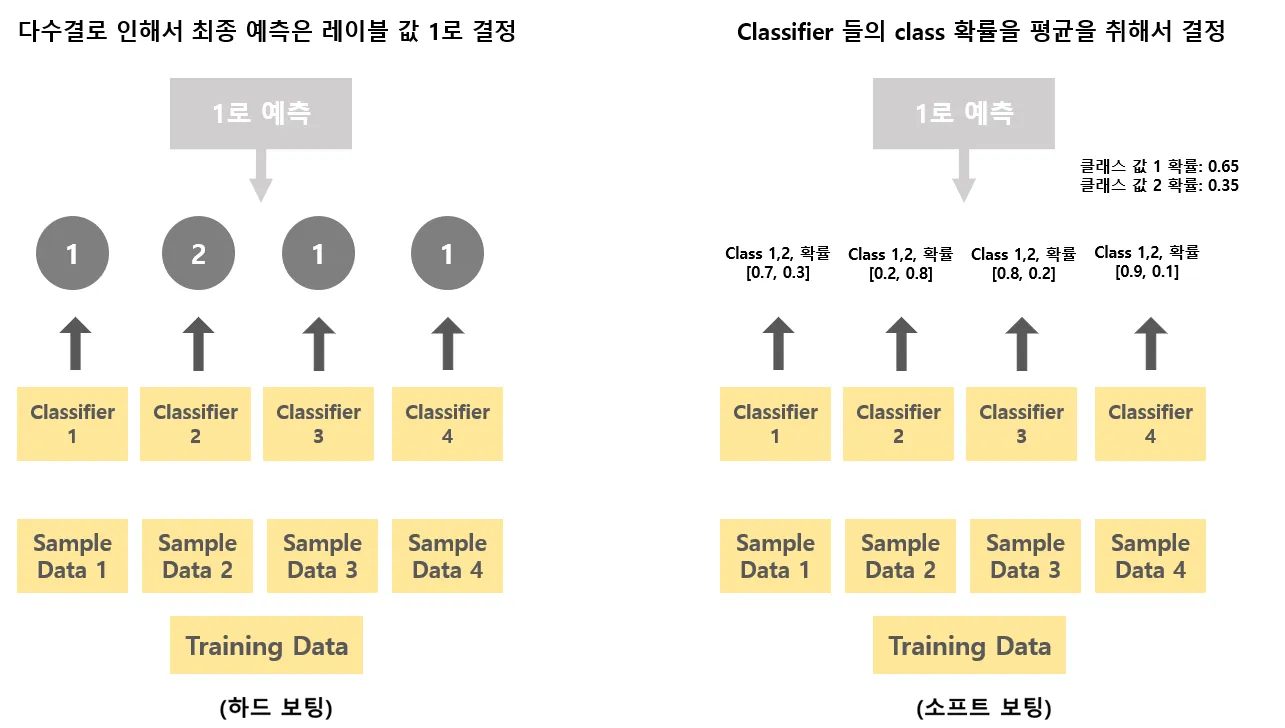